# 🌳 Modelo de Machine Learning para Predecir la Pobreza Monetaria en Perú

## 🎯 Objetivo de la Actividad
En este notebook, construiremos, entrenaremos y evaluaremos un modelo de **Random Forest** para predecir si un hogar en Perú caerá en situación de pobreza monetaria. Utilizaremos una base de datos sintética que simula las características de los hogares peruanos.

### ¿Por qué Random Forest?
El Random Forest (Bosque Aleatorio) es un modelo de *aprendizaje supervisado* ideal para este problema por varias razones:
- **Versatilidad**: Funciona muy bien tanto con variables numéricas como categóricas.
- **Robustez**: Es menos propenso al sobreajuste (overfitting) que un único árbol de decisión.
- **Interpretabilidad**: Nos permite conocer qué variables son las más importantes para predecir la pobreza.


### 📋 Hipótesis a Validar:
Esperamos que las variables más influyentes para predecir la pobreza (ahora que los datos son más realistas) sean las estructurales, no los indicadores directos de riqueza:
1.  **Nivel Educativo y Años de Estudio**: A mayor educación, menor probabilidad de pobreza.
2.  **Tipo de Empleo**: El empleo formal protege contra la pobreza.
3.  **Área de Residencia**: La incidencia de pobreza suele ser mayor en zonas rurales.
4.  **Número de Miembros en el Hogar**: A más miembros, mayor necesidad de ingresos.

### 🧠 Conceptos Clave que Aprenderemos:
- **Preprocesamiento de datos**: Cómo preparar variables categóricas y numéricas.
- **Pipelines en Scikit-learn**: Para organizar nuestro flujo de trabajo de forma profesional.
- **Entrenamiento de un clasificador**: Cómo enseñarle al modelo a partir de los datos.
- **Métricas de Evaluación**: No solo la exactitud (accuracy), sino también la **Precisión**, el **Recall** y la **Matriz de Confusión**, cruciales para problemas sociales.
- **Importancia de Variables (Feature Importance)**: Cómo el modelo nos "explica" su decisión.

## 📚 1. Definición del Problema y Preparación Inicial

In [4]:
# Importamos las librerías necesarias para nuestro análisis

# Para manipulación de datos
import pandas as pd
import numpy as np

# Para visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

# Para preprocesamiento y modelado con Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# Para evaluar el modelo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, RocCurveDisplay

# Configuraciones adicionales
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

print("✅ Librerías importadas correctamente. ¡Listos para empezar!")

✅ Librerías importadas correctamente. ¡Listos para empezar!


## 🛠️ 2. Preprocesamiento y Limpieza de Datos
Este es el paso más crítico en cualquier proyecto de Machine Learning.  Nuestro objetivo es transformar los datos crudos en un formato limpio y estructurado que el modelo pueda entender.

### Pasos a seguir:
1.  **Cargar los datos**: Importar nuestro archivo `prediccion_pobreza_peru.csv`.
2.  **Inspección inicial**: Entender la estructura, tipos de datos y buscar posibles problemas (aunque nuestra base es sintética y limpia).
3.  **Separar variables**: Dividir nuestro dataset en variables predictoras (`X`) y la variable objetivo (`y`).
4.  **Identificar tipos de variables**: Separar las columnas numéricas de las categóricas para aplicarles transformaciones diferentes.

In [5]:
# 2.1 Cargar e Inspeccionar los Datos
df = pd.read_csv('prediccion_pobreza_peru.csv')

print("Primeras 5 filas del dataset:")
display(df.head())

print("\nInformación general del DataFrame:")
df.info()

print(f"\nEl dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

# Verificamos que no haya valores nulos (importante en un caso real)
print("\nConteo de valores nulos por columna:")
print(df.isnull().sum())

Primeras 5 filas del dataset:


,EdadJefeHogar,SexoJefeHogar,MiembrosHogar,RatioDependencia,LenguaMaterna,NivelEducativoJefeHogar,TipoEmpleo,AreaResidencia,Region,AccesoAguaPotable,AccesoSaneamiento,Hacinamiento,PoseeActivos,TenenciaVivienda,MaterialParedes,AccesoElectricidad,AniosEstudioJefeHogar,IngresoMensualHogar,GastoMensualHogar,PobrezaMonetaria
0,20,Hombre,4,0.48,Español,Secundaria,Informal,Rural,Costa,1,1,1,1,Propia,Ladrillo/Cemento,1,10,735.00,746.73,1
1,45,Mujer,8,1.27,Español,Secundaria,Informal,Urbana,Costa,1,0,0,1,Propia,Ladrillo/Cemento,1,7,2568.16,2465.73,1
2,39,Mujer,4,0.12,Español,Superior,Desempleado,Rural,Costa,1,1,1,1,Propia,Ladrillo/Cemento,1,21,1474.71,1704.89,1
3,28,Mujer,3,2.85,Español,Ninguno,Formal,Urbana,Costa,1,1,1,0,Alquilada,Madera/Esteras,1,0,3420.87,2935.34,0
4,36,Hombre,7,1.90,Español,Superior,Informal,Rural,Selva,1,1,1,1,Propia,Adobe,1,14,922.37,676.64,1



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EdadJefeHogar            2000 non-null   int64  
 1   SexoJefeHogar            2000 non-null   object 
 2   MiembrosHogar            2000 non-null   int64  
 3   RatioDependencia         2000 non-null   float64
 4   LenguaMaterna            2000 non-null   object 
 5   NivelEducativoJefeHogar  2000 non-null   object 
 6   TipoEmpleo               2000 non-null   object 
 7   AreaResidencia           2000 non-null   object 
 8   Region                   2000 non-null   object 
 9   AccesoAguaPotable        2000 non-null   int64  
 10  AccesoSaneamiento        2000 non-null   int64  
 11  Hacinamiento             2000 non-null   int64  
 12  PoseeActivos             2000 non-null   int64  
 13  TenenciaVivienda         2000 non-null   o

In [6]:
# 2.2 Separar variables predictoras (X) y objetivo (y)

#Definimos los predictores y quitamos las variables que nos vamos a usar.
X = df.drop(['PobrezaMonetaria', 'IngresoMensualHogar', 'GastoMensualHogar'], axis=1)

#Definimos la variable a predecir
y = df['PobrezaMonetaria']

print(f"Dimensiones de X (variables predictoras): {X.shape}")
print(f"Dimensiones de y (variable objetivo): {y.shape}")

# 2.3 Identificar columnas numéricas y categóricas
numerical_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

print(f"\nColumnas Numéricas ({len(numerical_cols)}): {list(numerical_cols)}")
print(f"\nColumnas Categóricas ({len(categorical_cols)}): {list(categorical_cols)}")

Dimensiones de X (variables predictoras): (2000, 17)
Dimensiones de y (variable objetivo): (2000,)

Columnas Numéricas (9): ['EdadJefeHogar', 'MiembrosHogar', 'RatioDependencia', 'AccesoAguaPotable', 'AccesoSaneamiento', 'Hacinamiento', 'PoseeActivos', 'AccesoElectricidad', 'AniosEstudioJefeHogar']

Columnas Categóricas (8): ['SexoJefeHogar', 'LenguaMaterna', 'NivelEducativoJefeHogar', 'TipoEmpleo', 'AreaResidencia', 'Region', 'TenenciaVivienda', 'MaterialParedes']


## 3. División de los Datos (Entrenamiento y Prueba)
Para evaluar de manera honesta el rendimiento de nuestro modelo, debemos dividir nuestros datos en dos conjuntos:

- **Conjunto de Entrenamiento (Training set)**: Usado para "enseñar" al modelo. Generalmente es el 70-80% de los datos.
- **Conjunto de Prueba (Test set)**: Usado para evaluar qué tan bien generaliza el modelo a datos nuevos que nunca ha visto.

Usaremos el parámetro `stratify=y` para asegurar que la proporción de hogares pobres y no pobres sea la misma en ambos conjuntos.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,      # 30% de los datos para el conjunto de prueba
    random_state=42,    # Semilla para reproducibilidad
    stratify=y          # Mantener la proporción de la variable objetivo
)

print("Distribución de la variable objetivo en el conjunto original:")
print(y.value_counts(normalize=True))

print("\nDistribución en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))

print("\nDistribución en el conjunto de prueba:")
print(y_test.value_counts(normalize=True))

print(f"\nTamaño del conjunto de entrenamiento: {X_train.shape[0]} hogares")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} hogares")

Distribución de la variable objetivo en el conjunto original:
PobrezaMonetaria
0    0.5715
1    0.4285
Name: proportion, dtype: float64

Distribución en el conjunto de entrenamiento:
PobrezaMonetaria
0    0.571429
1    0.428571
Name: proportion, dtype: float64

Distribución en el conjunto de prueba:
PobrezaMonetaria
0    0.571667
1    0.428333
Name: proportion, dtype: float64

Tamaño del conjunto de entrenamiento: 1400 hogares
Tamaño del conjunto de prueba: 600 hogares


### 💡 Análisis de la División: Un Dataset más Balanceado

Los resultados de la división de datos muestran un data set balanceado. Es decir que la porporcion de ambas clases es similar.

##  4. Entrenamiento del Modelo Random Forest


### ¿Qué es un Pipeline?
Un Pipeline de Scikit-learn encadena múltiples pasos de preprocesamiento y modelado en un solo objeto. Esto tiene grandes ventajas:
- **Código más limpio**: Evita tener que aplicar transformaciones paso a paso.
- **Previene errores**: Asegura que apliquemos las mismas transformaciones a los datos de entrenamiento y de prueba.
- **Facilita la automatización**: Simplifica la búsqueda de los mejores parámetros (hiperparámetros).

### Nuestro Pipeline contendrá:
1.  **Un transformador para variables numéricas**: `StandardScaler` para estandarizarlas (media 0, desviación 1).
2.  **Un transformador para variables categóricas**: `OneHotEncoder` para convertirlas a un formato numérico que el modelo entienda.
3.  **El modelo clasificador**: `RandomForestClassifier`.

In [8]:
# Creamos el pipeline para las variables numéricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Creamos el pipeline para las variables categóricas
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # 'ignore' para manejar categorías en test que no estaban en train
])

# Combinamos los preprocesadores usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough' # Mantiene columnas no especificadas (si las hubiera)
)

# Creamos el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42, # Semilla: Asegura que la aleatoriedad del algoritmo sea la misma en cada ejecución
                                  
                                  n_estimators=100) # n_estimators=100: Especifica que el "bosque" estará compuesto por 100 árboles de decisión

# Creamos el Pipeline final que une el preprocesador y el modelo
pipeline_final = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_model)
])

# ¡Entrenamos el modelo!
print("🚀 Entrenando el modelo Random Forest...")
pipeline_final.fit(X_train, y_train)
print("✅ ¡Modelo entrenado exitosamente!")

🚀 Entrenando el modelo Random Forest...
✅ ¡Modelo entrenado exitosamente!


##  5. Evaluación del Modelo
Entrenar un modelo no es suficiente. Necesitamos saber qué tan bueno es.

### Métricas Clave:
- **Matriz de Confusión**: Una tabla que nos muestra los aciertos y errores del modelo.
  - **Verdaderos Positivos (TP)**: Predijo "Pobre" y acertó.
  - **Verdaderos Negativos (TN)**: Predijo "No Pobre" y acertó.
  - **Falsos Positivos (FP)**: Predijo "Pobre" pero era "No Pobre" (Error Tipo I).
  - **Falsos Negativos (FN)**: Predijo "No Pobre" pero era "Pobre" (Error Tipo II). **¡Sigue siendo el error más costoso socialmente!**
- **Precisión (Precision)**: De todos los que predijo como "Pobres", ¿cuántos lo eran realmente? `TP / (TP + FP)`
- **Recall (Sensibilidad)**: De todos los que *eran* "Pobres", ¿a cuántos identificamos correctamente? `TP / (TP + FN)`.
- **F1-Score**: La media armónica de Precisión y Recall. Un buen balance entre ambas.
- **ROC-AUC Score**: Mide la capacidad del modelo para distinguir entre las dos clases. Un valor de 1 es perfecto, 0.5 es aleatorio.

Classification Report
              precision    recall  f1-score   support

No Pobre (0)       0.82      0.87      0.84       343
   Pobre (1)       0.81      0.74      0.77       257

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600

Accuracy (Exactitud): 0.8150
ROC-AUC Score: 0.9022
NOTA: El reporte de Clasififcacion muestra las metricas para ambas clases.

Matriz de Confusión:


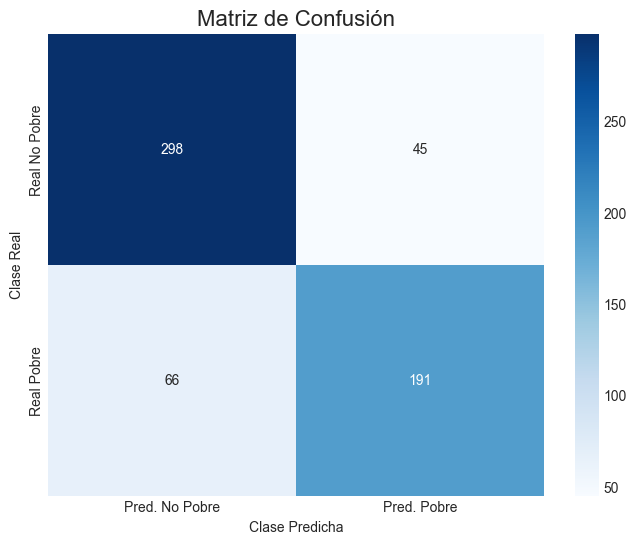

In [9]:
# Hacemos predicciones en el conjunto de prueba
y_pred = pipeline_final.predict(X_test)
y_pred_proba = pipeline_final.predict_proba(X_test)[:, 1] # Probabilidades para la clase positiva

# 1. Reporte de Clasificación
print("="*60)
print("Classification Report")
print("="*60)
print(classification_report(y_test, y_pred, target_names=['No Pobre (0)', 'Pobre (1)']))

# 2. Accuracy y ROC-AUC
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Accuracy (Exactitud): {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("="*60)
print("NOTA: El reporte de Clasififcacion muestra las metricas para ambas clases.")

# 3. Matriz de Confusión
print("\nMatriz de Confusión:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Pred. No Pobre', 'Pred. Pobre'],
            yticklabels=['Real No Pobre', 'Real Pobre'])
plt.title('Matriz de Confusión', fontsize=16)
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.savefig('1_matriz_confusion_base.png')
plt.show()

Curva ROC:


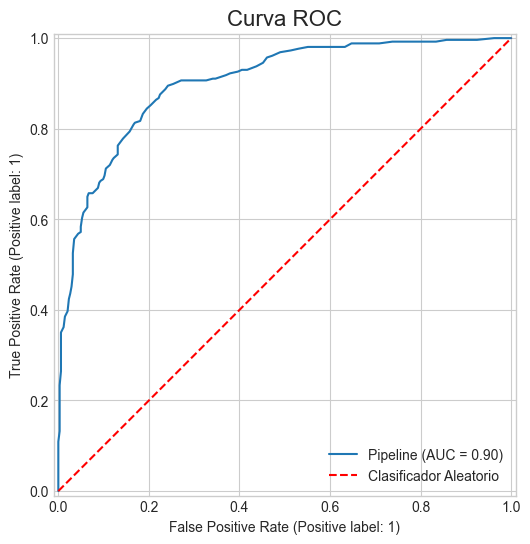

In [10]:
# 4. Curva ROC (Receiver Operating Characteristic)
# Esta curva nos muestra el rendimiento del clasificador en todos los umbrales de clasificación.
# Un buen modelo se pega a la esquina superior izquierda.

print("Curva ROC:")
fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_estimator(pipeline_final, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', color='r', label='Clasificador Aleatorio')
ax.set_title('Curva ROC', fontsize=16)
plt.legend()
plt.savefig('2_curva_roc_base.png')
plt.show()

### Diagnóstico

La exactitud general es significativamente alta (81%) y, lo que es más importante, las métricas de `precision` y `recall` para ambas clases son robustas.

Esto indica que el modelo está aprendiendo patrones genuinos de las variables estructurales (educación, empleo, etc.) para predecir la pobreza, en lugar de depender de la fuga de datos del ingreso.

Aunque el rendimiento inicial ya es bueno, siempre podemos intentar mejorarlo mediante un **ajuste de hiperparámetros**.

### ¿Cómo Mejorar el Modelo?

Usaremos `GridSearchCV` para encontrar la combinación óptima de hiperparámetros. Nuestro objetivo será maximizar la **exactitud (`accuracy`) general**, lo que nos dará el modelo con el mejor rendimiento global.

Esto nos permitirá afinar detalles como la complejidad de los árboles (`max_depth`) y el número de árboles en el bosque (`n_estimators`) para exprimir un poco más de rendimiento del modelo.

In [11]:
# 1. DEFINICIÓN DE LA REJILLA DE HIPERPARÁMETROS
# Se define un diccionario que contiene los hiperparámetros a explorar y sus respectivos valores.
# Cada valor en las listas representa una configuración específica que el modelo probará.
param_grid = {
    # 'classifier__n_estimators': Número de árboles de decisión en el bosque.
    # Estamos probando tres escenarios:
    #   - 150: Un bosque de tamaño considerable.
    #   - 250: Un bosque más grande, para ver si mejora el rendimiento.
    #   - 300: Un bosque muy grande, para comprobar si hemos alcanzado un punto de rendimiento decreciente.
    'classifier__n_estimators': [150, 250, 300],
    
    # 'classifier__max_depth': Profundidad máxima de cada árbol.
    # Estamos probando:
    #   - 10: Un árbol relativamente "superficial", que crea reglas más generales.
    #   - 20: Un árbol más profundo, capaz de aprender patrones más complejos.
    #   - None: Sin límite. El árbol crecerá hasta que cada hoja sea "pura" (contenga solo una clase).
    'classifier__max_depth': [10, 20, None],
    
    # 'classifier__min_samples_leaf': Número mínimo de muestras (hogares) que deben existir en un nodo final (hoja).
    'classifier__min_samples_leaf': [1, 2, 4]
}
# 2. CONFIGURAR EL BUSCADOR INTELIGENTE: GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline_final,
    param_grid=param_grid,
    # scoring: Ahora optimizamos para la exactitud general.
    scoring='accuracy',
    cv=3,       # Validación cruzada con 3 pliegues
    n_jobs=-1,  # Usar todos los núcleos de CPU
    verbose=1
)

# 3. EJECUTAR LA BÚSQUEDA
grid_search.fit(X_train, y_train)

# 4. MOSTRAR LOS RESULTADOS
print("\n✅ Búsqueda completada.")
print("La mejor configuración de hiperparámetros es:")
print(grid_search.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits

✅ Búsqueda completada.
La mejor configuración de hiperparámetros es:
{'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__n_estimators': 150}


### Evaluación Final: Modelo Optimizado


Rendimiento del Modelo Optimizado
              precision    recall  f1-score   support

No Pobre (0)       0.83      0.87      0.85       343
   Pobre (1)       0.81      0.77      0.79       257

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600

Accuracy (Exactitud): 0.8250
ROC-AUC Score: 0.9131


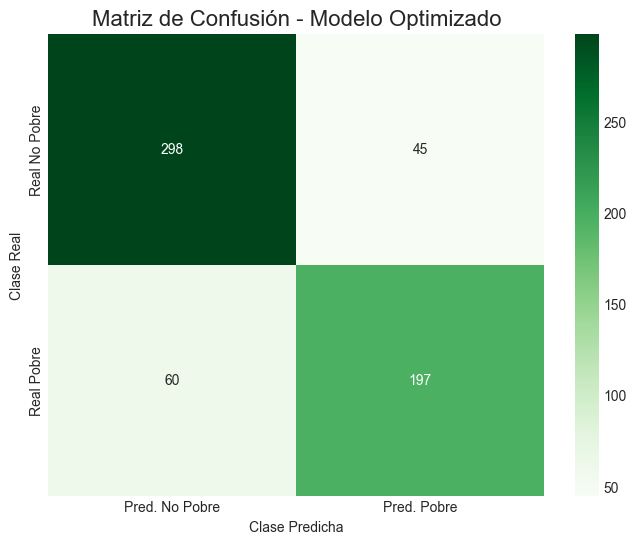

In [12]:
# Extraemos el mejor modelo encontrado por GridSearchCV
best_model = grid_search.best_estimator_

# Hacemos predicciones con este nuevo modelo
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1] # Probabilidades para la clase positiva

# Evaluamos el rendimiento del modelo optimizado
print("\n" + "="*60)
print("Rendimiento del Modelo Optimizado")
print("="*60)
print(classification_report(y_test, y_pred_best, target_names=['No Pobre (0)', 'Pobre (1)']))


# Calculamos y mostramos Accuracy y ROC-AUC
accuracy_best = accuracy_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_proba_best)
print(f"Accuracy (Exactitud): {accuracy_best:.4f}")
print(f"ROC-AUC Score: {roc_auc_best:.4f}")
print("="*60)


# Visualizamos la nueva matriz de confusión
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Pred. No Pobre', 'Pred. Pobre'],
            yticklabels=['Real No Pobre', 'Real Pobre'])
plt.title('Matriz de Confusión - Modelo Optimizado', fontsize=16)
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.savefig('3_matriz_confusion_optimizado.png')
plt.show()

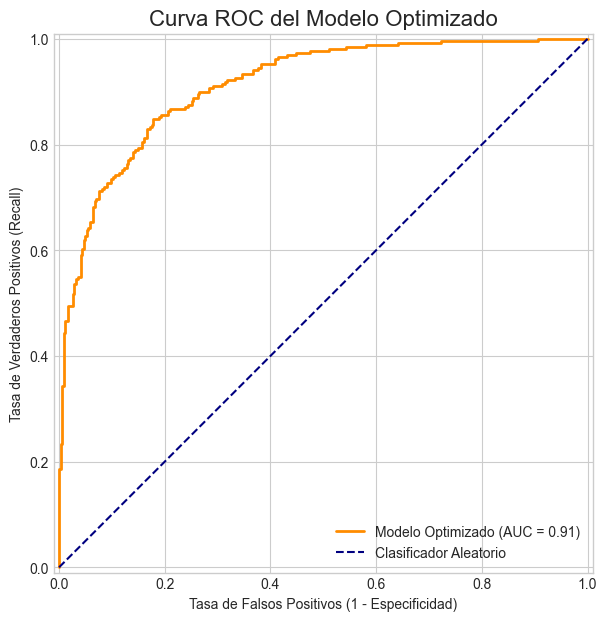

In [13]:
#Curva ROC

fig, ax = plt.subplots(figsize=(8, 7))

# Graficar la Curva ROC para el modelo optimizado ('best_model')
RocCurveDisplay.from_estimator(
    best_model,
    X_test,
    y_test,
    ax=ax,
    name='Modelo Optimizado',
    color='darkorange', # Un color que destaque
    linewidth=2
)

ax.plot([0, 1], [0, 1], linestyle='--', color='navy', label='Clasificador Aleatorio')

ax.set_title('Curva ROC del Modelo Optimizado', fontsize=16)
ax.set_xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
ax.set_ylabel('Tasa de Verdaderos Positivos (Recall)')

ax.legend(loc='lower right')
ax.grid(True)
plt.savefig('4_curva_roc_optimizado.png')
plt.show()

### Conclusión

La optimización ha sido un éxito. Al instruir a `GridSearchCV` para que maximizara la **`accuracy`**, logramos refinar un modelo que ya era bueno y mejorar su rendimiento general. El modelo optimizado muestra una ligera mejora en la exactitud y en el AUC, demostrando que el ajuste de hiperparámetros es un paso valioso para maximizar el potencial de un algoritmo.

## 🔍 6. Interpretación del Modelo
Una de las mayores ventajas de los modelos basados en árboles como Random Forest es que podemos "preguntarles" qué variables consideraron más importantes para tomar sus decisiones.

### Importancia de Variables (Feature Importance)
El modelo calcula la importancia de cada variable midiendo cuánto contribuye a reducir la "impureza" (o el desorden) en los nodos de los árboles. Una variable que separa muy bien a los hogares pobres de los no pobres tendrá una alta importancia.

A continuación, extraeremos estas puntuaciones y las visualizaremos para validar nuestra hipótesis inicial.

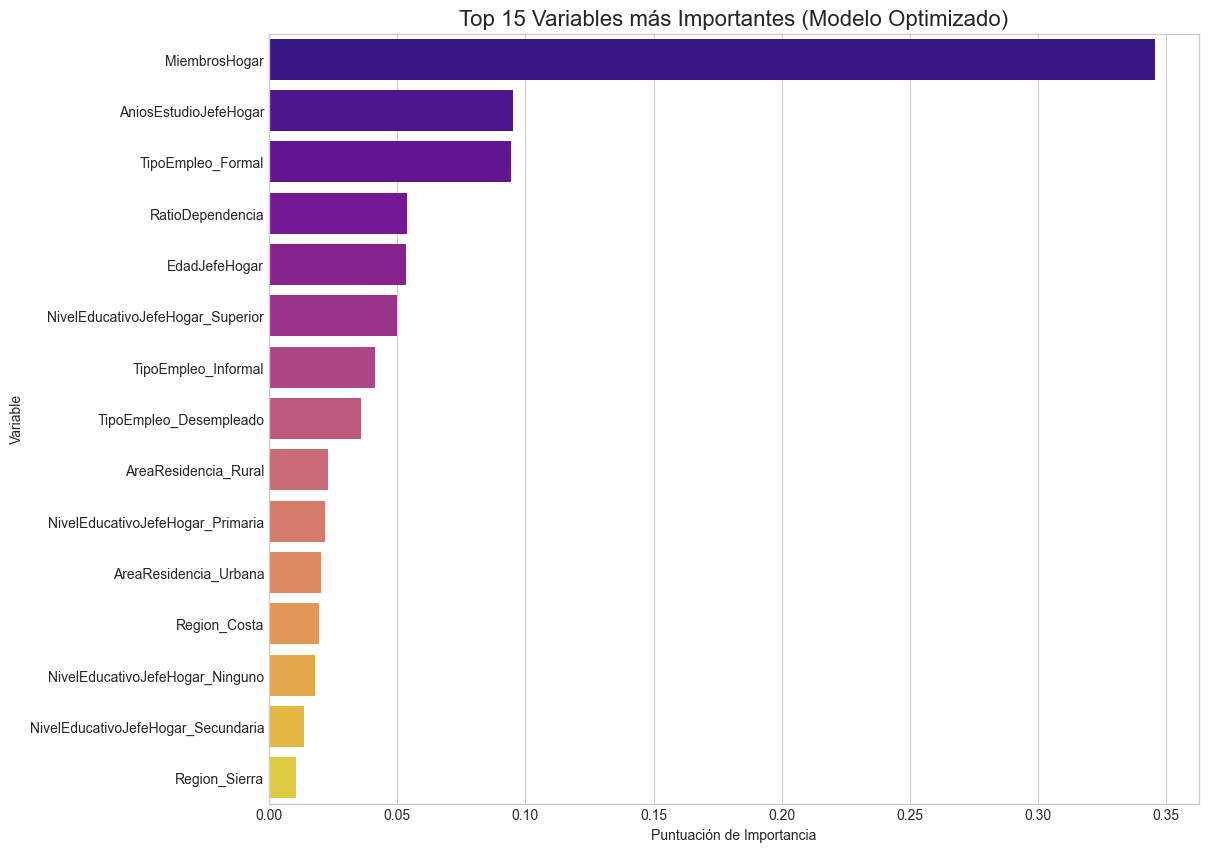


Top 10 variables más importantes:


,feature,importance
1,MiembrosHogar,0.345563
8,AniosEstudioJefeHogar,0.095364
20,TipoEmpleo_Formal,0.094339
2,RatioDependencia,0.053781
0,EdadJefeHogar,0.053321
18,NivelEducativoJefeHogar_Superior,0.049959
21,TipoEmpleo_Informal,0.041307
19,TipoEmpleo_Desempleado,0.035877
22,AreaResidencia_Rural,0.022863
16,NivelEducativoJefeHogar_Primaria,0.021676


In [14]:
# Extraer los componentes del mejor modelo encontrado por GridSearchCV
preprocessor_best = best_model.named_steps['preprocessor']
classifier_best = best_model.named_steps['classifier']

# Obtener los nombres de todas las características después del preprocesamiento
try:
    ohe_feature_names = preprocessor_best.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)
except AttributeError:
    ohe_feature_names = preprocessor_best.named_transformers_['cat']['onehot'].get_feature_names(categorical_cols)

all_feature_names = np.concatenate([numerical_cols, ohe_feature_names])

# Obtener las puntuaciones de importancia del clasificador optimizado
importances = classifier_best.feature_importances_

# Crear un DataFrame para ordenar y visualizar las importancias
feature_importance_df = pd.DataFrame({
    'feature': all_feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

# Visualizar las 15 variables más importantes
plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15), palette='plasma')
plt.title('Top 15 Variables más Importantes (Modelo Optimizado)', fontsize=16)
plt.xlabel('Puntuación de Importancia')
plt.ylabel('Variable')
plt.savefig('5_importancia_variables.png')
plt.show()

# Mostrar el top 10 en una tabla
print("\nTop 10 variables más importantes:")
display(feature_importance_df.head(10))


##  7. Conclusión General del Ejercicio


El análisis de la importancia de las variables del modelo optimizado permite validar la hipótesis del ejercicio. Se postuló que, en ausencia de indicadores directos de riqueza, el modelo identificaría factores estructurales como los predictores principales de la pobreza monetaria. Los resultados confirman esta premisa.

1.  **Demografía del Hogar:** Este es el factor más relevante. `MiembrosHogar` es el predictor con la mayor importancia (0.345), indicando que la composición del hogar es un determinante principal. `RatioDependencia` y `EdadJefeHogar` también figuran entre las cinco variables más influyentes, reforzando el peso de la estructura demográfica.

2.  **Capital Humano y Situación Laboral:** Los `AniosEstudioJefeHogar` (0.095) y el `TipoEmpleo_Formal` (0.094) son el segundo y tercer predictor más importantes, respectivamente. La presencia de otras categorías relacionadas, como el nivel educativo y la condición de desempleo, confirma que la educación y la calidad del empleo son factores determinantes.

3.  **Ubicación Geográfica:** La variable `AreaResidencia_Rural` se identifica como un predictor relevante, lo que es consistente con una mayor incidencia de pobreza en dichas zonas.

En conclusión, el modelo ha identificado los factores subyacentes de la pobreza en lugar de depender de variables que son una consecuencia directa de la misma. La eliminación deliberada de los datos de ingreso y gasto ha permitido que el modelo cuantifique el impacto de determinantes socioeconómicos y demográficos, validando así su utilidad como herramienta de diagnóstico.




In [ ]:
# Importar la librería SHAP
import shap

# Extraer el preprocesador y el clasificador del mejor modelo
preprocessor_best = best_model.named_steps['preprocessor']
classifier_best = best_model.named_steps['classifier']

# Transformar los datos de prueba para que coincidan con el modelo
X_test_transformed = preprocessor_best.transform(X_test)

# Obtener los nombres de las características transformadas
try:
    ohe_feature_names = preprocessor_best.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)
except AttributeError:
    ohe_feature_names = preprocessor_best.named_transformers_['cat']['onehot'].get_feature_names(categorical_cols)

all_feature_names = np.concatenate([numerical_cols, ohe_feature_names])

# Crear el objeto explainer usando el clasificador
explainer = shap.TreeExplainer(classifier_best)

# Calcular los valores SHAP
shap_values = explainer.shap_values(X_test_transformed)

# Generar el gráfico de resumen SHAP
shap.summary_plot(shap_values[1], X_test_transformed, feature_names=all_feature_names)


ValueError: could not convert string to float: 'Mujer'

In [ ]:
shap.summary_plot(shap_values, X_test)
